# Imports

In [105]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

In [215]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img

from keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix

from time import strftime

import matplotlib.pyplot as plt

%matplotlib inline


# Constants

In [216]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane','Car','Bird','Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH*IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS

NR_CLASSES = 10

VALIDATION_SIZE= 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [108]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [109]:
type(x_train_all)

numpy.ndarray

# Explore the Data

In [110]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

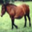

In [111]:
pic = array_to_img(x_train_all[7])
display(pic)

In [112]:
y_train_all.shape

(50000, 1)

In [113]:
y_train_all[7][0]

7

In [114]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

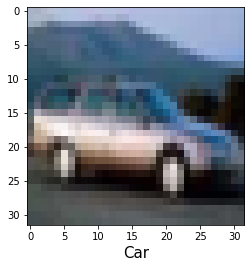

In [115]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

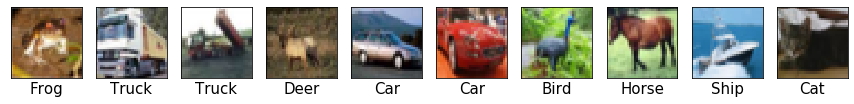

In [116]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(x_train_all[i])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=15)


In [117]:
x_train_all[0].shape

(32, 32, 3)

In [118]:
nr_images, x, y, c = x_train_all.shape
print(f'Images = {nr_images} \t| width = {x}\t| height = {y} \t| chanels = {c}')

Images = 50000 	| width = 32	| height = 32 	| chanels = 3


In [119]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [120]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [121]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [122]:
type(x_train_all[0][0][0][0])

numpy.float64

In [123]:
x_train_all[0][0][0][0]

0.23137254901960785

In [124]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [125]:
x_train_all.shape

(50000, 3072)

In [126]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


In [127]:
x_train_all

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

### Create Validation Dataset

In [128]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [129]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [130]:
x_train.shape

(40000, 3072)

In [131]:
y_train.shape

(40000, 1)

### Create a small Dataset

In [132]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using Keras

In [133]:
model_1 = Sequential([
    Dense(units = 128, input_dim = TOTAL_INPUTS, activation = 'relu', name='m1_hidden1'),
    Dense(units = 64, activation = 'relu', name='m1_hidden2'),
    Dense(units = 16, activation = 'relu', name='m1_hidden3'),
    Dense(units = 10, activation = 'softmax', name='m1_output')
])

model_1.compile(optimizer='adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [134]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation = 'relu', name='m2_hidden1'))
model_2.add(Dense(64, activation = 'relu', name='m2_hidden2'))
model_2.add(Dense(16, activation = 'relu', name='m2_hidden3'))
model_2.add(Dense(10, activation = 'softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [135]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation = 'relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation = 'relu', name='m3_hidden2'))
model_3.add(Dense(16, activation = 'relu', name='m3_hidden3'))
model_3.add(Dense(10, activation = 'softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [136]:
type(model_1)

keras.engine.sequential.Sequential

In [137]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [138]:
32*32*3*128+128 +128*64+64+64*16+16+16*10+10

402810

# Tensorboard (visualising learning)

In [139]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')
    
    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [140]:
sampple_per_batch = 1000

In [141]:
# %%time
#
# nr_epochs = 150
#
# model_1.fit(x_train_xs, y_train_xs, batch_size=sampple_per_batch, epochs=nr_epochs, verbose=0,
#            callbacks=[get_tensorboard('Model 1')], validation_data=(x_val, y_val))

In [142]:
# %%time

# nr_epochs = 100

# model_2.fit(x_train, y_train, batch_size=sampple_per_batch, epochs=nr_epochs, verbose=0,
#            callbacks=[get_tensorboard('Model 2 XL')], validation_data=(x_val, y_val))

In [143]:
# %%time

# nr_epochs = 150

# model_3.fit(x_train_xs, y_train_xs, batch_size=sampple_per_batch, epochs=nr_epochs, verbose=0,
#            callbacks=[get_tensorboard('Model 3')], validation_data=(x_val, y_val))

In [144]:
%%time

nr_epochs = 100

model_1.fit(x_train, y_train, batch_size=sampple_per_batch, epochs=nr_epochs, verbose=0,
            callbacks=[get_tensorboard('Model 1 XL')], validation_data=(x_val, y_val))

Successfully created directory


C:\Users\Probook\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Probook\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Probook\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Probook\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Probook\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. E





Wall time: 5min 34s


In [145]:
%%time

nr_epochs = 100

model_2.fit(x_train, y_train, batch_size=sampple_per_batch, epochs=nr_epochs, verbose=0,
            callbacks=[get_tensorboard('Model 2 XL')], validation_data=(x_val, y_val))

Successfully created directory
Wall time: 8min 26s


In [146]:
%%time

nr_epochs = 100

model_3.fit(x_train, y_train, batch_size=sampple_per_batch, epochs=nr_epochs, verbose=0,
            callbacks=[get_tensorboard('Model 3 XL')], validation_data=(x_val, y_val))

Successfully created directory
Wall time: 8min 24s


# Prediction

In [147]:
x_val[0].shape

(3072,)

In [148]:
test = np.expand_dims(x_val[0], axis = 0)
test.shape

(1, 3072)

In [149]:
np.set_printoptions(precision = 3)

In [150]:
model_2.predict(test).sum()

1.0

In [151]:
model_2.predict(test)

array([[0.015, 0.002, 0.166, 0.158, 0.198, 0.106, 0.29 , 0.062, 0.   ,
        0.002]], dtype=float32)

In [152]:
model_2.predict(x_val)

array([[1.517e-02, 2.247e-03, 1.657e-01, ..., 6.243e-02, 4.662e-04,
        2.058e-03],
       [1.555e-02, 8.430e-01, 3.149e-04, ..., 1.046e-03, 4.768e-02,
        8.996e-02],
       [3.090e-03, 4.540e-02, 9.240e-04, ..., 2.674e-02, 4.363e-03,
        9.113e-01],
       ...,
       [2.057e-02, 5.534e-01, 1.245e-03, ..., 7.948e-03, 8.462e-02,
        3.098e-01],
       [7.479e-03, 5.484e-01, 2.386e-02, ..., 7.297e-03, 1.191e-02,
        1.980e-01],
       [2.900e-03, 8.858e-05, 5.873e-02, ..., 6.448e-01, 4.242e-05,
        4.370e-04]], dtype=float32)

In [153]:
model_2.predict(x_val).shape

(10000, 10)

In [154]:
model_2.predict_classes(test)

array([6], dtype=int64)

In [155]:
y_val[0]

array([6], dtype=uint8)

In [197]:
def make_pred(number_of_pred, model_name):
    correct = 0
    for i in range(number_of_pred):
        img_val = np.expand_dims(x_val[i], axis = 0)
        pred_val = model_name.predict_classes(img_val)
        if ( y_val[i] == pred_val): correct += 1
        print(f'Prediction for {i} image is {pred_val} | actual class is {y_val[i]} ')
    print(f'Number of correct prediction: {correct}')
    

In [202]:
make_pred(10, model_1)

Prediction for 0 image is [4] | actual class is [6] 
Prediction for 1 image is [9] | actual class is [9] 
Prediction for 2 image is [9] | actual class is [9] 
Prediction for 3 image is [6] | actual class is [4] 
Prediction for 4 image is [1] | actual class is [1] 
Prediction for 5 image is [6] | actual class is [1] 
Prediction for 6 image is [2] | actual class is [2] 
Prediction for 7 image is [7] | actual class is [7] 
Prediction for 8 image is [8] | actual class is [8] 
Prediction for 9 image is [9] | actual class is [3] 
Number of correct prediction: 6


# Evaluation

In [203]:
model_2.metrics_names

['loss', 'accuracy']

In [206]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

10000/10000 [==============================] - 1s 86us/step
Test loss is 1.45 and test accuracy is 48.9%


In [207]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

10000/10000 [==============================] - 1s 68us/step
Test loss is 1.48 and test accuracy is 48.7%


## Confusion matrix

In [209]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = model_2.predict_classes(x_test))

In [210]:
conf_matrix.shape

(10, 10)

In [211]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [212]:
conf_matrix.max()

639

In [213]:
conf_matrix.min()

5

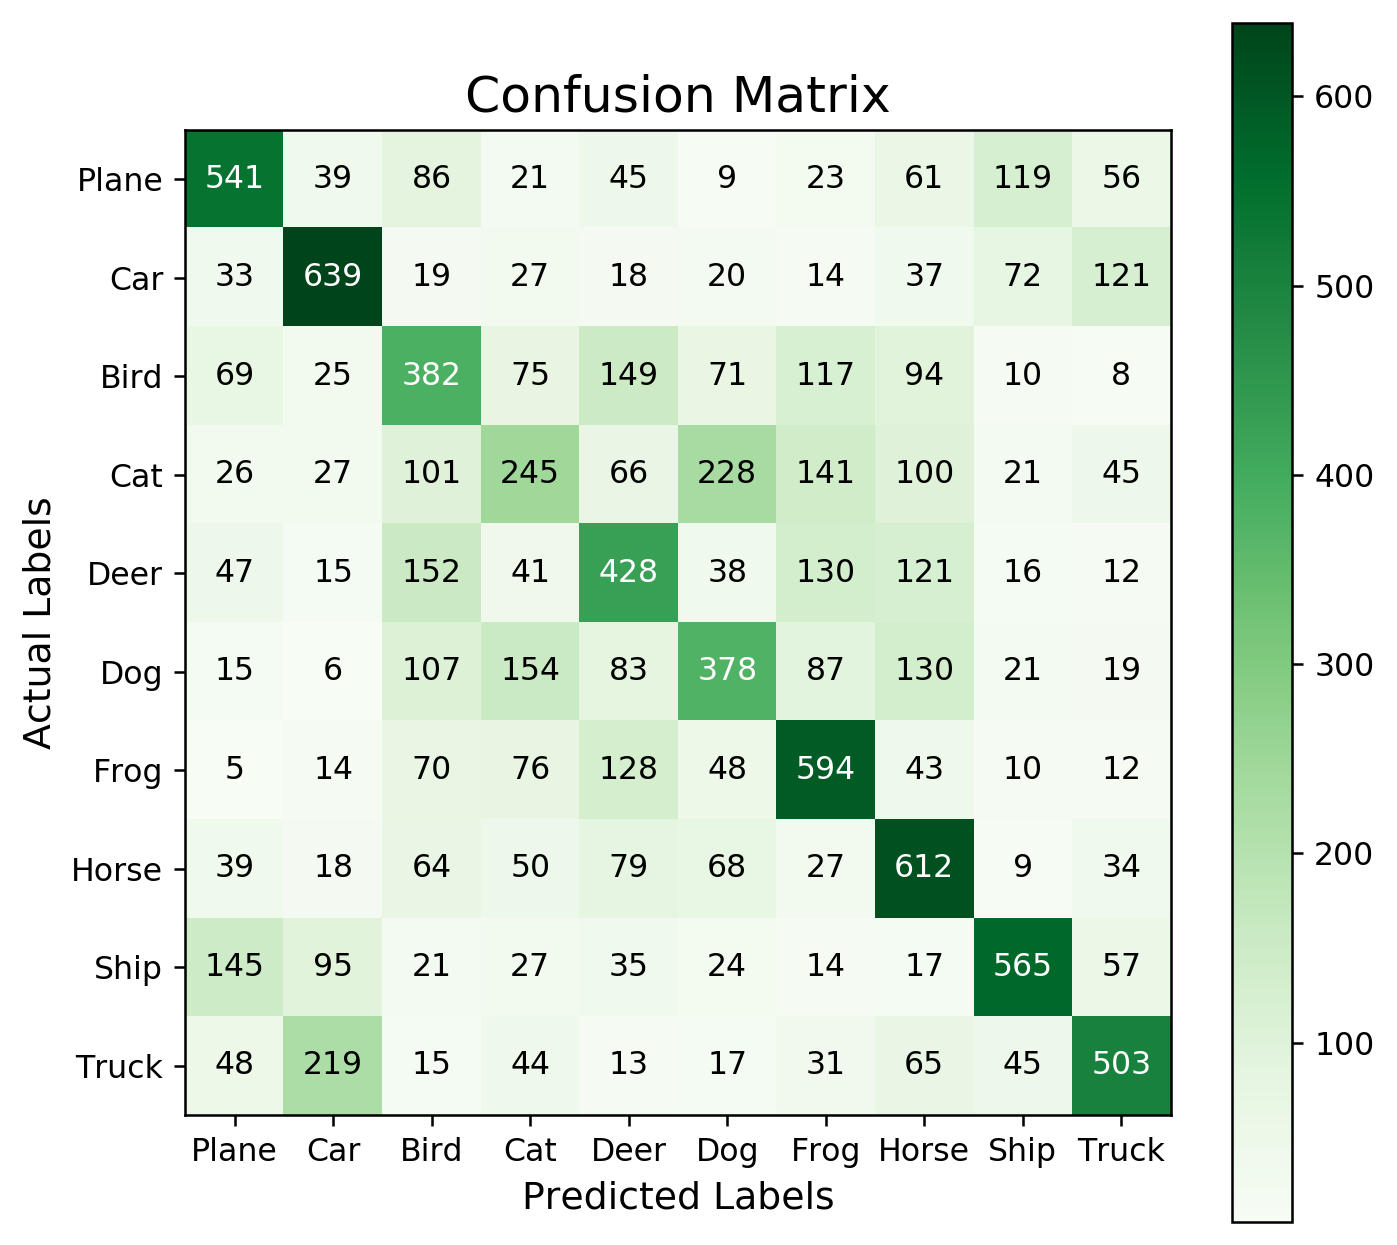

In [228]:
plt.figure(figsize=(7,7), dpi = 227)
plt.imshow(conf_matrix, cmap = plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize = 12)
plt.xlabel('Predicted Labels', fontsize = 12)

tick_mark = np.arange(NR_CLASSES)
plt.yticks(tick_mark, LABEL_NAMES)
plt.xticks(tick_mark, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', verticalalignment='center', 
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')



plt.show()

In [229]:
# True Positives
true_pos = np.diag(conf_matrix)

In [230]:
true_pos

array([541, 639, 382, 245, 428, 378, 594, 612, 565, 503], dtype=int64)

In [231]:
recall = true_pos / np.sum(conf_matrix, axis = 1)

In [232]:
recall

array([0.541, 0.639, 0.382, 0.245, 0.428, 0.378, 0.594, 0.612, 0.565,
       0.503])

In [235]:
precision = true_pos / np.sum(conf_matrix, axis = 0)
precision

array([0.559, 0.582, 0.376, 0.322, 0.41 , 0.42 , 0.504, 0.478, 0.636,
       0.58 ])

In [237]:
avg_recaal = np.mean(recall)
print(f'Model 2 recall score is {avg_recaal:.2%}')

Model 2 recall score is 48.87%


In [238]:
avg_prec = np.mean(precision)
print(f'Model 2 precision score is {avg_prec:.2%}')

Model 2 precision score is 48.68%


In [239]:
f1_score = 2 * (avg_prec * avg_recaal) / (avg_prec + avg_recaal)

In [241]:
print(f'Model 2 F1 score is {f1_score:.2%}')

Model 2 F1 score is 48.77%
